# **Project Machine Learning: Exam Score Prediction (Regression)**
PPTI 18 | Kelompok 4
- 2702363733 | Angelina Joyvina
- 2702363790 | Elvinson Wijaya
- 2702364300 | Yehezkiel Michael

### **1. Introduction to the Dataset**

Pada project ini, kami menggunakan **Student Performance Factors**, sebuah dataset yang bersumber dari Kaggle (Link: [https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data]). Dataset ini menyediakan informasi yang komprehensif tentang berbagai faktor yang mempengaruhi performa siswa dalam ujian, termasuk kebiasaan belajar, kehadiran, keterlibatan orang tua, dan aspek lainnya yang mempengaruhi kesuksesan akademik.

Berikut adalah detailnya:
1. **Overview Dataset**  
   Dataset ini digunakan untuk menganalisis dan memprediksi performa akademik siswa berdasarkan berbagai faktor yang mempengaruhi, seperti **jumlah jam belajar**, **kehadiran di kelas**, **keterlibatan orang tua**, **kualitas guru**, dan lainnya. Tujuan dari proyek ini adalah untuk membangun model **regresi** yang dapat memprediksi **nilai ujian akhir siswa** berdasarkan variabel-variabel tersebut.

2. **Jumlah Baris**  
   Dataset ini terdiri dari total **6607 baris**, yang cukup besar untuk melakukan analisis yang mendalam dan menghasilkan model yang dapat diandalkan untuk prediksi performa akademik siswa.

3. **Tipe Data**  
   Dataset ini mengandung kombinasi data **kategorikal** dan **numerikal**, sesuai dengan ketentuan berikut:
   - *Kategorikal*:
     - **Parental_Involvement**: Tingkat keterlibatan orang tua dalam pendidikan siswa (Low, Medium, High).
     - **Access_to_Resources**: Ketersediaan sumber daya pendidikan (Low, Medium, High).
     - **Extracurricular_Activities**: Partisipasi dalam kegiatan ekstrakurikuler (Yes, No).
     - **Motivation_Level**: Tingkat motivasi siswa (Low, Medium, High).
     - **Internet_Access**: Ketersediaan akses internet (Yes, No).
     - **Family_Income**: Tingkat pendapatan keluarga (Low, Medium, High).
     - **Teacher_Quality**: Kualitas guru (Low, Medium, High).
     - **School_Type**: Jenis sekolah yang dihadiri (Public, Private).
     - **Peer_Influence**: Pengaruh teman sebaya terhadap performa akademik (Positive, Neutral, Negative).
     - **Learning_Disabilities**: Adanya gangguan belajar (Yes, No).
     - **Parental_Education_Level**: Tingkat pendidikan orang tua (High School, College, Postgraduate).
     - **Distance_from_Home**: Jarak dari rumah ke sekolah (Near, Moderate, Far).
     - **Gender**: Jenis kelamin siswa (Male, Female).
   - *Numerikal*:
     - **Hours_Studied**: Jumlah jam yang dihabiskan untuk belajar per minggu.
     - **Attendance**: Persentase kehadiran di kelas.
     - **Sleep_Hours**: Rata-rata jam tidur per malam.
     - **Previous_Scores**: Nilai dari ujian sebelumnya.
     - **Tutoring_Sessions**: Jumlah sesi les yang diikuti per bulan.
     - **Physical_Activity**: Rata-rata jam aktivitas fisik per minggu.
     - **Exam_Score**: Nilai ujian akhir yang ingin diprediksi.

Dataset ini cocok untuk membangun model **regresi** yang dapat memprediksi nilai **Exam_Score** (nilai ujian akhir) berdasarkan faktor-faktor yang ada. Dengan menggunakan data numerikal serta data kategorikal yang ada, model ini dapat memberikan wawasan mengenai faktor-faktor yang paling mempengaruhi performa siswa.

### **2. Import Library**

Berikut adalah library yang digunakan:
1. Manipulasi data: numpy, pandas
2. Visualisasi: matplotlib, seaborn
4. Preprocessing: StandardScaler, LabelEncoder, MinMaxScaler, train_test_split, GridSearchCV
5. Model Regresi: LinearRegression, Ridge, Lasso, xgb, DecisionTreeRegressor, RandomForestRegressor
6. Model Evaluasi: mean_squared_error (MSE), mean_absolute_error (MAE), r2_score (R^2)

In [340]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import skew

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set() # Membuat seaborn default for plots

In [341]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **3. Data Loading**

Memuat dataset ke dalam notebook. Dataset dalam format CSV, jadi menggunakan pustaka pandas untuk membacanya.

In [342]:
# Memuat dataset
file_path = './StudentPerformanceFactors.csv' 
data = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dari dataset untuk memastikan dataset sudah termuat dengan benar.
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA mencakup proses yang bertujuan untuk:

1. Memahami Struktur Data
2. Menangani Data yang Hilang
3. Menganalisis Distribusi dan Korelasi 
4. Membuat visualisasi Data 

In [343]:
# Meninjau jumlah baris, kolom, dan tipe data setiap kolom
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              

Informasi dataset menunjukkan bahwa dataset ini memiliki 6,607 baris dan 20 kolom. Selain itu, data info memberikan informasi mengenai tipe data, yakni:
- Numerikal: Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score.

- Kategorikal: Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender.

Ada beberapa kolom yang memiliki missing values, seperti:
- Teacher_Quality: 6529 non-null
- Parental_Education_Level: 6517 non-null
- Distance_from_Home: 6540 non-null

In [344]:
# Melihat total baris dan kolom dari dataset
data_shape = data.shape
print(f"Shape dari training data: {data_shape}")
print(f"Jumlah baris (sample): {data_shape[0]}")
print(f"Jumlah kolom (features): {data_shape[1]}\n\n")

Shape dari training data: (6607, 20)
Jumlah baris (sample): 6607
Jumlah kolom (features): 20




Diketahui bahwa dataset ini memiliki 6,607 baris dan 20 kolom (fitur), yang memberikan cukup banyak data untuk melakukan analisis dan prediksi.

In [345]:
# Menampilkan deskripsi statistik untuk kolom numerikal
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Berdasarkan deskripsi statistik, beberapa **insight** yang dapat diperoleh adalah:

1. **Hours_Studied**: Rata-rata siswa menghabiskan sekitar **20 jam per minggu** untuk belajar, dengan variasi besar, yang menunjukkan bahwa **hours studied** berpotensi mempengaruhi performa akademik.

2. **Attendance**: Rata-rata **80%** kehadiran menunjukkan bahwa meskipun sebagian besar siswa hadir secara teratur, **kehadiran yang tinggi** dapat terkait dengan **performa yang lebih baik**.

3. **Sleep_Hours**: Rata-rata **7 jam per malam**, yang ideal, tetapi variasi menunjukkan bahwa **sleep hours** sangat penting untuk performa akademik.

4. **Previous_Scores**: Dengan rata-rata **75.07**, nilai sebelumnya cenderung menjadi indikator kuat untuk **memperkirakan exam score**.

5. **Tutoring_Sessions**: Rata-rata **1.49 sesi les** menunjukkan bahwa sebagian kecil siswa mengikuti les secara rutin, yang bisa berdampak positif pada performa.

6. **Physical_Activity**: Rata-rata **3 jam per minggu** untuk aktivitas fisik, yang dapat mendukung **mental health** dan meningkatkan konsentrasi.

7. **Exam_Score**: Rata-rata **67.24**, menunjukkan distribusi nilai yang terpusat di kisaran menengah, dengan ruang untuk perbaikan bagi sebagian siswa.

Asumsi: Faktor seperti **hours studied**, **attendance**, **sleep hours**, dan **previous scores** tampaknya paling berpengaruh terhadap **exam score** siswa.

##### **Insight Penting**

Selain insight di atas, hal penting yang diketahui adalah nilai ujian (Exam_Score) yang nilai maksimalnya 101, yang melebihi sistem penilaian 100, yang menunjukkan adanya kemungkinan masalah dalam dataset. Ini bisa jadi kesalahan dalam pencatatan data atau outlier yang perlu dianalisis lebih lanjut. Kami akan kembali dan menangani hal ini nanti.

In [346]:
# Menampilkan deskripsi statistik untuk kolom kategorikal
data.describe(include=['O'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


Dari deskripsi statistik kolom kategorikal, kami memperoleh beberapa insight yaitu:

- **Parental_Involvement**: Tingkat keterlibatan orang tua yang paling banyak adalah **Medium**, diikuti oleh **High** dan **Low**. Ini menunjukkan bahwa keterlibatan orang tua **medium** memiliki dampak yang signifikan terhadap performa akademik siswa, namun kita perlu mengeksplorasi lebih lanjut apakah keterlibatan orang tua yang lebih tinggi dapat meningkatkan nilai ujian.

- **Access_to_Resources**: Mayoritas siswa memiliki **akses sumber daya pendidikan** dalam kategori **Medium**, diikuti oleh **Low** dan **High**. **Akses ke sumber daya** ini bisa berpengaruh langsung pada **performa akademik**, dan kita perlu melihat apakah siswa dengan akses lebih tinggi memiliki nilai ujian yang lebih baik.

- **Extracurricular_Activities**: Sebagian besar siswa berpartisipasi dalam **kegiatan ekstrakurikuler** (**Yes**), yang mungkin menunjukkan bahwa **partisipasi aktif** di luar jam sekolah memiliki efek positif pada nilai akademik, karena aktivitas ini bisa meningkatkan keterampilan sosial dan manajemen waktu.

- **Motivation_Level**: Kategori **Medium** mendominasi, diikuti oleh **High** dan **Low**. **Motivasi yang tinggi** kemungkinan berhubungan dengan **performa akademik** yang lebih baik, dan kita perlu mengeksplorasi bagaimana **motivasi** mempengaruhi **exam_score**.

- **Missing Values**: Terdapat **missing values** pada 3 kolom:
  1. **Teacher_Quality**: Terdapat **78 missing values**.
  2. **Parental_Education_Level**: Terdapat **90 missing values**.
  3. **Distance_from_Home**: Terdapat **67 missing values**.

Pengolahan data yang hilang pada kolom-kolom ini akan penting agar tidak mempengaruhi **model prediksi exam_score** secara negatif.

In [347]:
# Mengecek jumlah missing values di setiap kolom
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Karena persentase **missing values** pada kolom **Parental_Education_Level**, **Teacher_Quality**, dan **Distance_from_Home** relatif rendah, kami memutuskan untuk **menghapus baris yang memiliki missing values** pada kolom-kolom tersebut. Keputusan ini diambil karena jumlah data yang hilang tidak terlalu signifikan (hanya sekitar 1-2% dari total data), sehingga penghapusan data yang hilang tidak akan berdampak besar pada hasil model.

Kami memilih untuk **menghapus** baris dengan missing values daripada melakukan **imputasi** karena:
1. **Proses imputasi** bisa menambah bias atau kesalahan, terutama jika nilai yang hilang tidak memiliki pola yang jelas atau distribusi yang konsisten.
2. **Menghapus baris** dengan missing values akan menjaga integritas data dan mencegah data yang mungkin terdistorsi oleh imputasi.
   
Pembersihan missing values ini akan dilakukan pada tahap **data preprocessing**, sebelum melanjutkan ke tahap model training.

In [348]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=['float64', 'int64'])
num_features.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


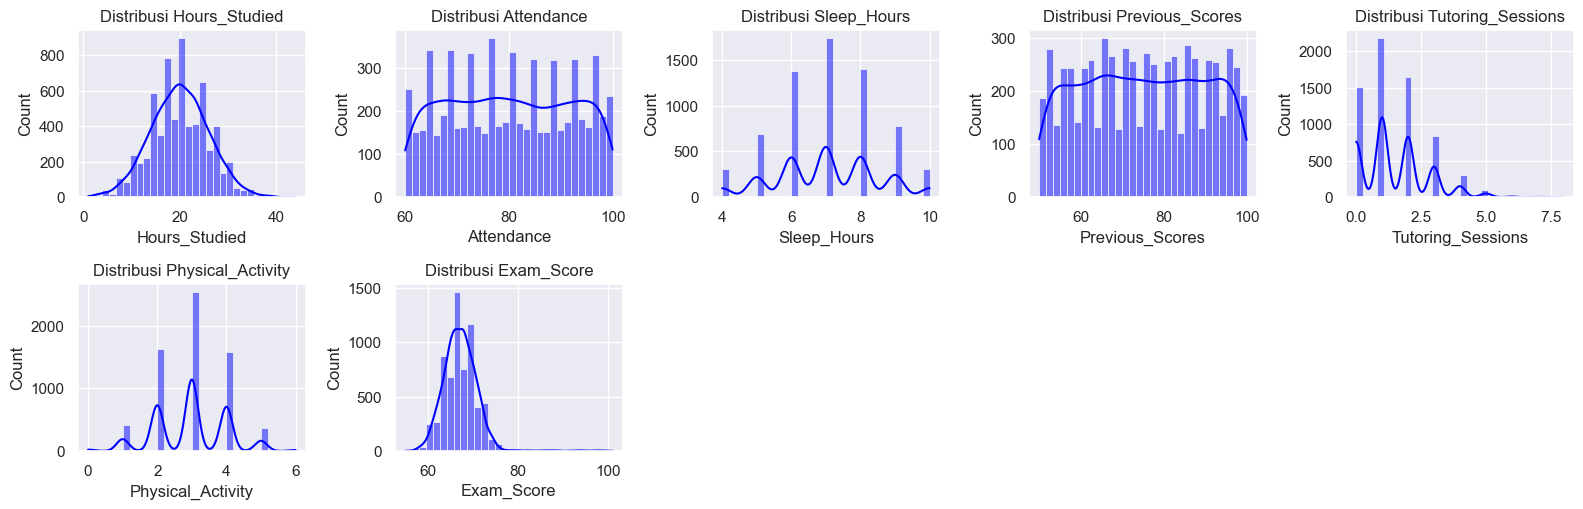

In [349]:
plt.figure(figsize=(16, 20))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(8, 5, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Distribusi fitur numerik menunjukkan beberapa pola penting:

1. **Hours_Studied**: Sebagian besar siswa belajar antara **10-30 jam** per minggu, dengan puncak di **20 jam**.
2. **Attendance**: Sebagian besar siswa hadir antara **60-100%**, dengan distribusi yang cukup merata.
3. **Sleep_Hours**: Mayoritas siswa tidur antara **6-8 jam** per malam.
4. **Previous_Scores**: Sebagian besar siswa memiliki nilai ujian sebelumnya antara **60-90**.
5. **Tutoring_Sessions**: Mayoritas siswa mengikuti **kurang dari 3 sesi les per bulan**.
6. **Physical_Activity**: Siswa rata-rata aktif antara **2-4 jam per minggu**.
7. **Exam_Score**: Sebagian besar nilai ujian akhir tersebar di sekitar **60-80**.

Distribusi ini menunjukkan adanya variasi yang signifikan pada faktor-faktor yang dapat mempengaruhi nilai ujian akhir siswa. 

Terlihat bahwa persebaran data dari setiap fitur telah cukup baik. Untuk Hours_Studied, Sleep_Hours, dan Physical_Activity, telah dalam distribusi normal. Attendace dan Previous_Score berada dalam distribusi seragam (uniform). sedangkan untuk tutoring_sessions, data sangat skewed

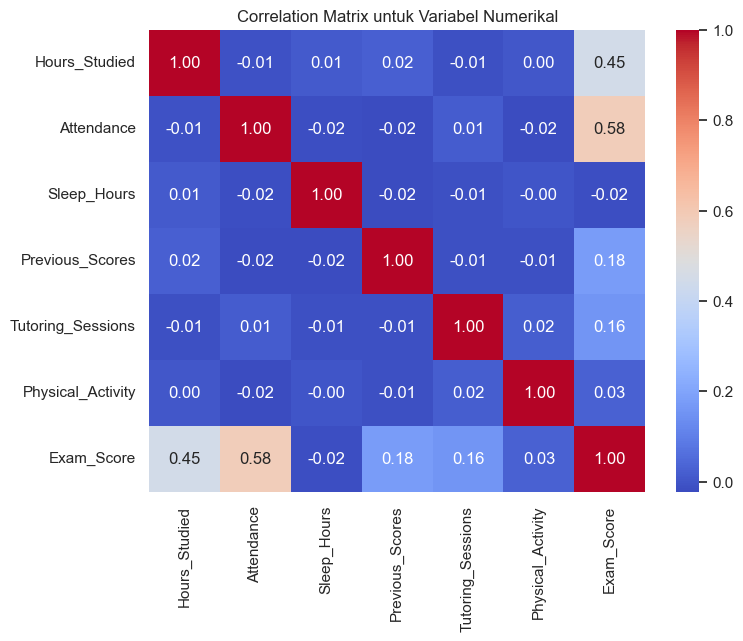

In [350]:
# Menganalisis korelasi antar variabel numerikal
correlation_matrix = num_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix untuk Variabel Numerikal")
plt.show()

Berdasarkan **correlation matrix** untuk variabel numerikal, berikut adalah beberapa **insight** yang dapat diperoleh:

- **Hours_Studied** dan **Exam_Score** memiliki **korelasi positif sedang (0.45)**, yang menunjukkan bahwa semakin banyak waktu yang dihabiskan untuk belajar, semakin tinggi kemungkinan nilai ujian siswa.
  
- **Attendance** dan **Exam_Score** memiliki korelasi yang **lebih kuat (0.58)**, yang mengindikasikan bahwa **kehadiran** yang lebih tinggi di kelas berhubungan positif dengan **nilai ujian** yang lebih baik. Hal ini menunjukkan pentingnya **kehadiran di kelas** sebagai faktor utama dalam **performa akademik** siswa.

- **Previous_Scores** dan **Exam_Score** memiliki korelasi yang relatif **rendah (0.18)**, menunjukkan bahwa meskipun ada hubungan, nilai ujian sebelumnya tidak selalu menentukan performa ujian berikutnya.

- **Physical_Activity**, **Tutoring_Sessions**, dan **Sleep_Hours** menunjukkan korelasi yang sangat lemah dengan **Exam_Score**, yang menunjukkan bahwa faktor-faktor tersebut mungkin tidak secara langsung mempengaruhi nilai ujian akhir.

Secara keseluruhan, meskipun hubungan antar variabel numerikal cenderung **rendah hingga moderat**, korelasi **Attendance** dan **Exam_Score** menunjukkan hubungan yang lebih signifikan, dan **Hours_Studied** juga memiliki kontribusi yang cukup besar. Hal ini menunjukkan bahwa **kehadiran dan waktu belajar** adalah faktor penting dalam memprediksi **nilai ujian**.

#### Analisis lebih lanjut mengenai **Korelasi Fitur dan Label**:

1. **Hours_Studied vs Exam_Score**

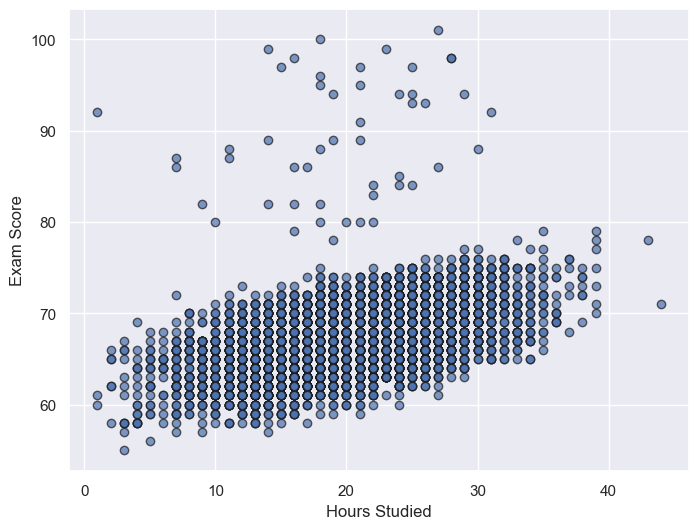

In [351]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Hours_Studied"], data['Exam_Score'], alpha=0.7, edgecolors='k')
plt.xlabel("Hours Studied")
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Insight: Terlihat pada scatter plot ini, bahwa terdapat sedikit hubungan linear antara fitur Hour Studied dan Exam Score. Hal ini berarti murid yang belajar lebih lama memiliki nilai yang lebih tinggi. Namun tetap terdapat beberapa outlier dimana mereka yang belajar dengan waktu yang lebih sedikit dapat memiliki nilai yang lebih tinggi.

2. **Attendance vs Exam_Score**

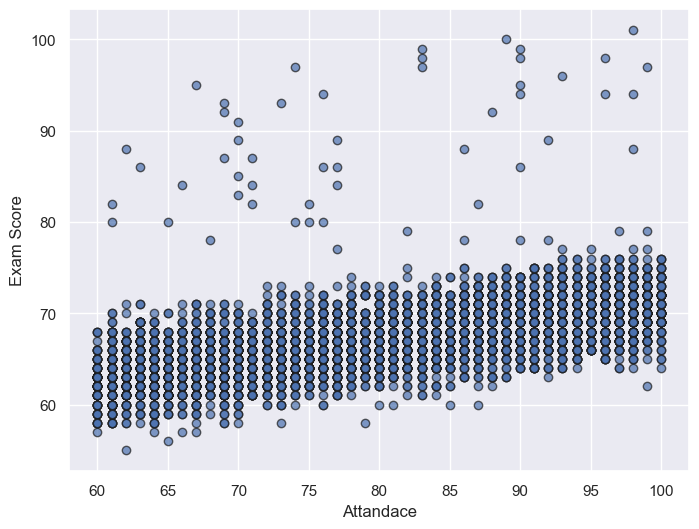

In [352]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Attendance"], data['Exam_Score'], alpha=0.7, edgecolors='k')
plt.xlabel("Attandace")
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Insight: Terlihat berdasarkan scatter plot diatas bahwa terdapat korelasi positif diantara fitur Attandance dan Exam Score. Hal ini tentunya masuk akal bahwa murid yang selalu masuk kelas akan memiliki nilai yang lebih tinggi. Mereka yang selalu masuk kelas umumnya memiliki pemahaman yang lebih tinggi kepada mata pelajaran yang diajarkan.

3. **Sleep_Hours vs Exam_Score**

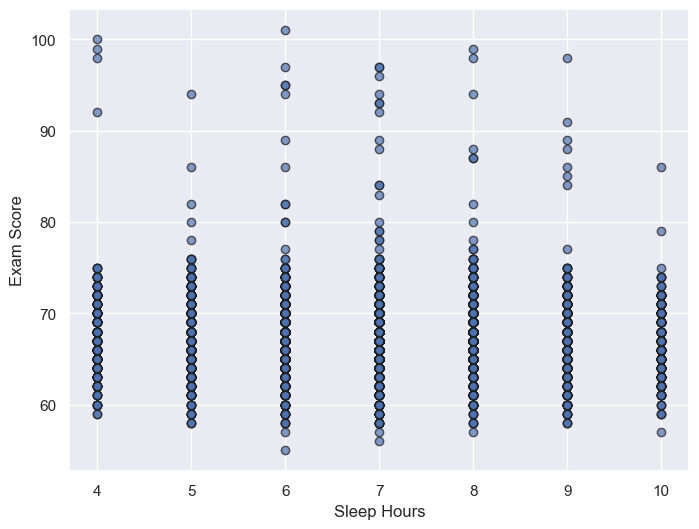

In [353]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Sleep_Hours"], data['Exam_Score'], alpha=0.7, edgecolors='k')
plt.xlabel("Sleep Hours")
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Insight: Berdasarkan scatter plot di atas, tidak terdapat korelasi antara Sleep Hour dengan Exam Score, hal ini berarti bisa saja mereka yang tidurnya lebih sedikit tidak digunakan untuk belajar melainkan hal-hal lain. Mungkin kita mengira bahwa mereka yang tidur nya lebih sedikit akan memiliki nilai dengan tinggi, namun harus diperhatikan apakah waktu tidur itu dimanfaatkan untuk belajar atau aktivitas-aktivitas lainnya.

4. **Previous_Score vs Exam_Score**

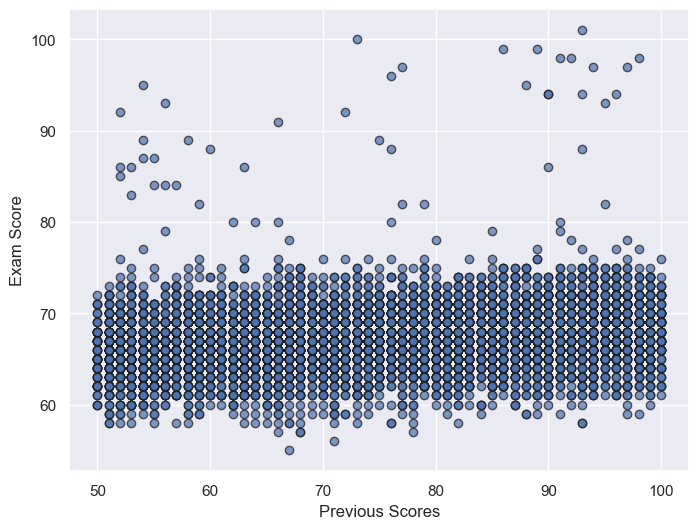

In [354]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Previous_Scores"], data['Exam_Score'], alpha=0.7, edgecolors='k')
plt.xlabel("Previous Scores")
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Insight: Berdasarkan scatter plot di atas, terdapat sedikit korelasi positif signifikan antara fitur Previous Score dan Exam Score. Hal ini berarti mereka yang nilainya baik sebelumnya, belum tentu mendapatkan nilai yang baik juga nantinya. Meski begitu, masih terdapat sedikit korelasi kecil antara fitur ini dengan label. 

5. **Tutoring_Sessions vs Exam_Score**

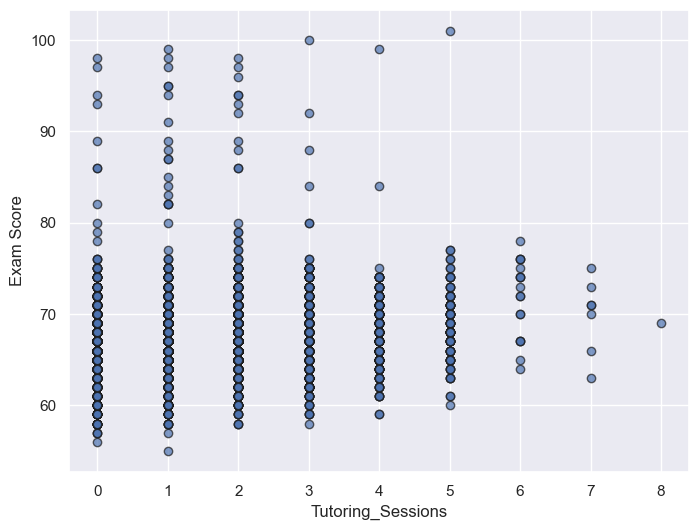

In [355]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Tutoring_Sessions"], data['Exam_Score'], alpha=0.7, edgecolors='k')
plt.xlabel("Tutoring_Sessions")
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Insight: Berdasarkan scatter plot diatas, terdapat sedikit korelasi positif antara Tutoring Session dengan Exam Score. Hal ini berarti bahwa mereka yang mempunyai sesi tutoring yang lebih belum tentu memiliki nilai yang lebih tinggi karena terdapat mereka yang tanpa tutoring pun sudah dapat menguasai mata pelajaran dengan baik. Namun secara keseluruhan mereka yang memiliki tutoring sessions yang lebih banyak, tentunya akan memiliki nilai yang cendrung lebih baik. Dan mereka yang memiliki nilai tinggi dan tutoring sessions rendah merupakan mereka yang spesial dan bisa dianggap sebagai outlier.

6. **Physical_Activity vs Exam_Score**

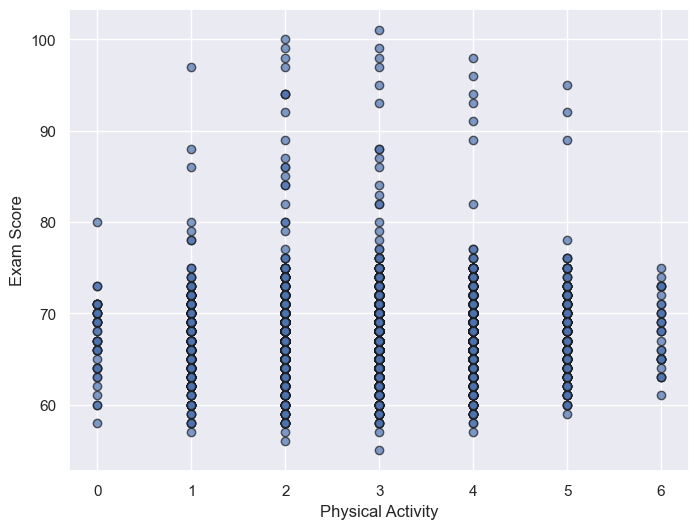

In [356]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Physical_Activity"], data['Exam_Score'], alpha=0.7, edgecolors='k')
plt.xlabel("Physical Activity")
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Insight: Berdasarkan scatter plot di atas, tidak terdapat korelasi antara Physical Activity dan Exam Score. Mereka yang sering berolahraga belum tentu memiliki nilai yang lebih tinggi.

In [357]:
# Distribusi fitur Categorical
cat_features = data.select_dtypes(include=['object', 'category'])
cat_features.head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


C:\Users\elvin\AppData\Local\Temp\ipykernel_26064\1486365142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')
C:\Users\elvin\AppData\Local\Temp\ipykernel_26064\1486365142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')
C:\Users\elvin\AppData\Local\Temp\ipykernel_26064\1486365142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis')
C:\Users\elvin\AppData\Local\Temp\ipykernel_26064\1486365142.py:4: FutureWarning: 

Passing `pale

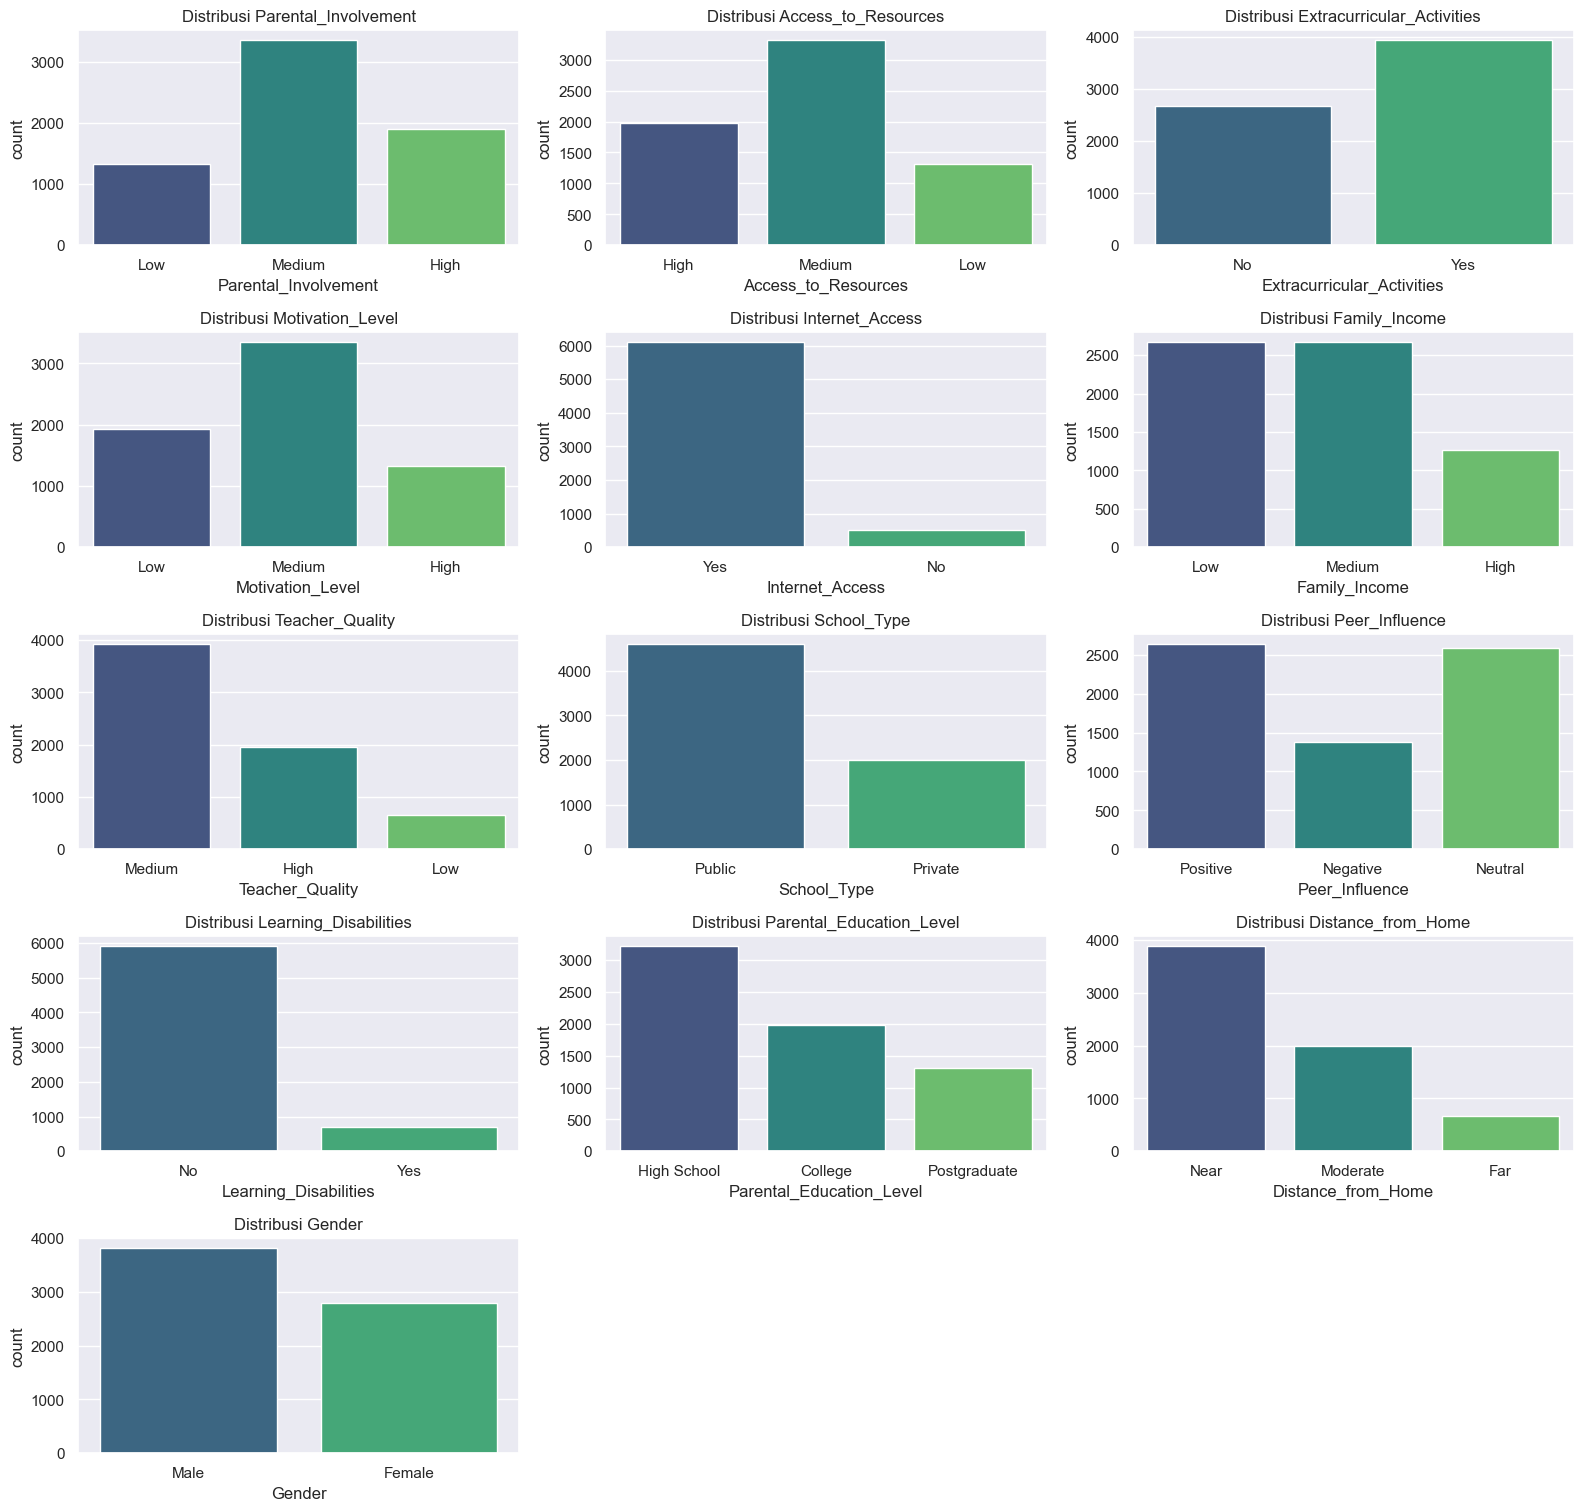

In [358]:
plt.figure(figsize=(16, 45))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(15, 3, i)  
    sns.countplot(x=data[column], palette='viridis')  
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Berdasarkan distribusi fitur kategorikal, berikut beberapa insight utama:
1. **Parental_Involvement** lebih banyak pada kategori **Medium**, menunjukkan keterlibatan orang tua yang cukup umum dalam mendukung siswa.
2. **Access_to_Resources** sebagian besar **Medium**, menandakan banyak siswa dengan akses pendidikan terbatas, namun cukup.
3. **Extracurricular_Activities** dominan di **Yes**, mengindikasikan bahwa kegiatan ekstrakurikuler memainkan peran besar dalam pengembangan siswa.
4. **Motivation_Level** lebih banyak di **Medium**, menandakan sebagian besar siswa memiliki motivasi belajar yang sedang.
5. **Internet_Access** lebih banyak di **Yes**, yang menunjukkan pentingnya akses internet dalam mendukung pembelajaran.
6. **Teacher_Quality** mayoritas **Medium**, dengan kualitas pengajaran yang dianggap baik, meskipun bisa lebih ditingkatkan.
7. **School_Type** didominasi oleh **Public**, menunjukkan kebanyakan siswa bersekolah di sekolah negeri.
8. **Family_Income** lebih banyak di **Low**, mencerminkan bahwa sebagian besar siswa berasal dari keluarga dengan pendapatan lebih rendah.
9. **Peer_Influence** lebih banyak **Positif**, menunjukkan bahwa pengaruh teman sebaya cenderung mendukung performa akademik siswa.
10. **Learning_Disabilities** sebagian besar **No**, dengan sedikit siswa yang mengalami gangguan belajar.
11. **Gender** menunjukkan lebih banyak **pria (Male)** daripada **wanita (Female)**.
12. **Distance_from_Home** sebagian besar **Near**, menandakan banyak siswa tinggal dekat dengan sekolah.

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


C:\Users\elvin\AppData\Local\Temp\ipykernel_26064\901646582.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Exam_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});


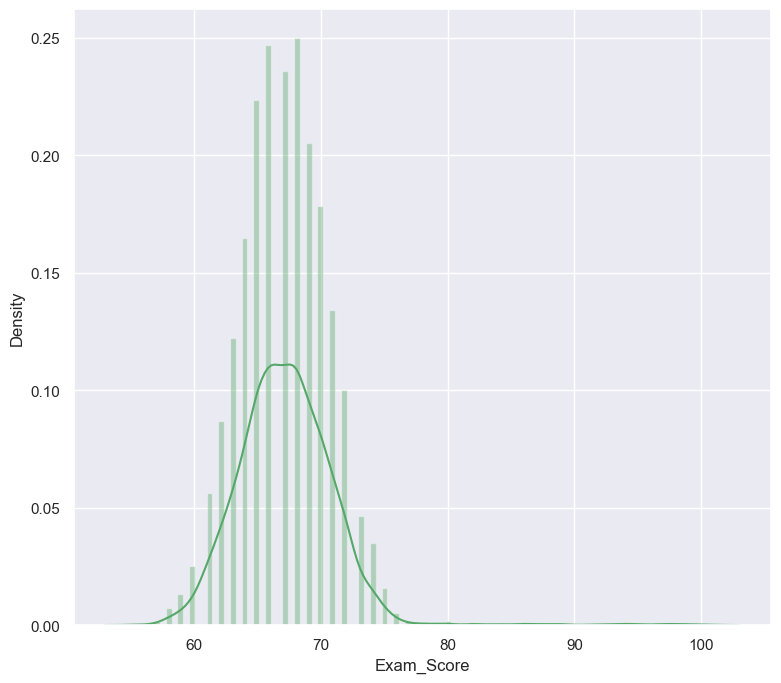

In [359]:
# Visualisasi distribusi variabel target
print(data['Exam_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Exam_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

Berdasarkan **distribusi nilai ujian (Exam_Score)**, beberapa **insight** yang dapat diperoleh adalah:

1. **Pola distribusi** menunjukkan distribusi **normal** dengan **puncak** di sekitar **67**. Sebagian besar nilai ujian siswa terdistribusi antara **65 hingga 70**.
2. Nilai ujian **tersebar lebih sedikit** di sekitar **nilai tinggi (>90)**, dan terdapat **nilai 101** yang tidak sesuai dengan skala 100. Hal ini perlu diperbaiki.
3. **Rata-rata nilai ujian** adalah **67.24** dengan **standar deviasi** yang cukup rendah (**3.89**), menunjukkan sebagian besar siswa memiliki nilai ujian yang cukup seragam.

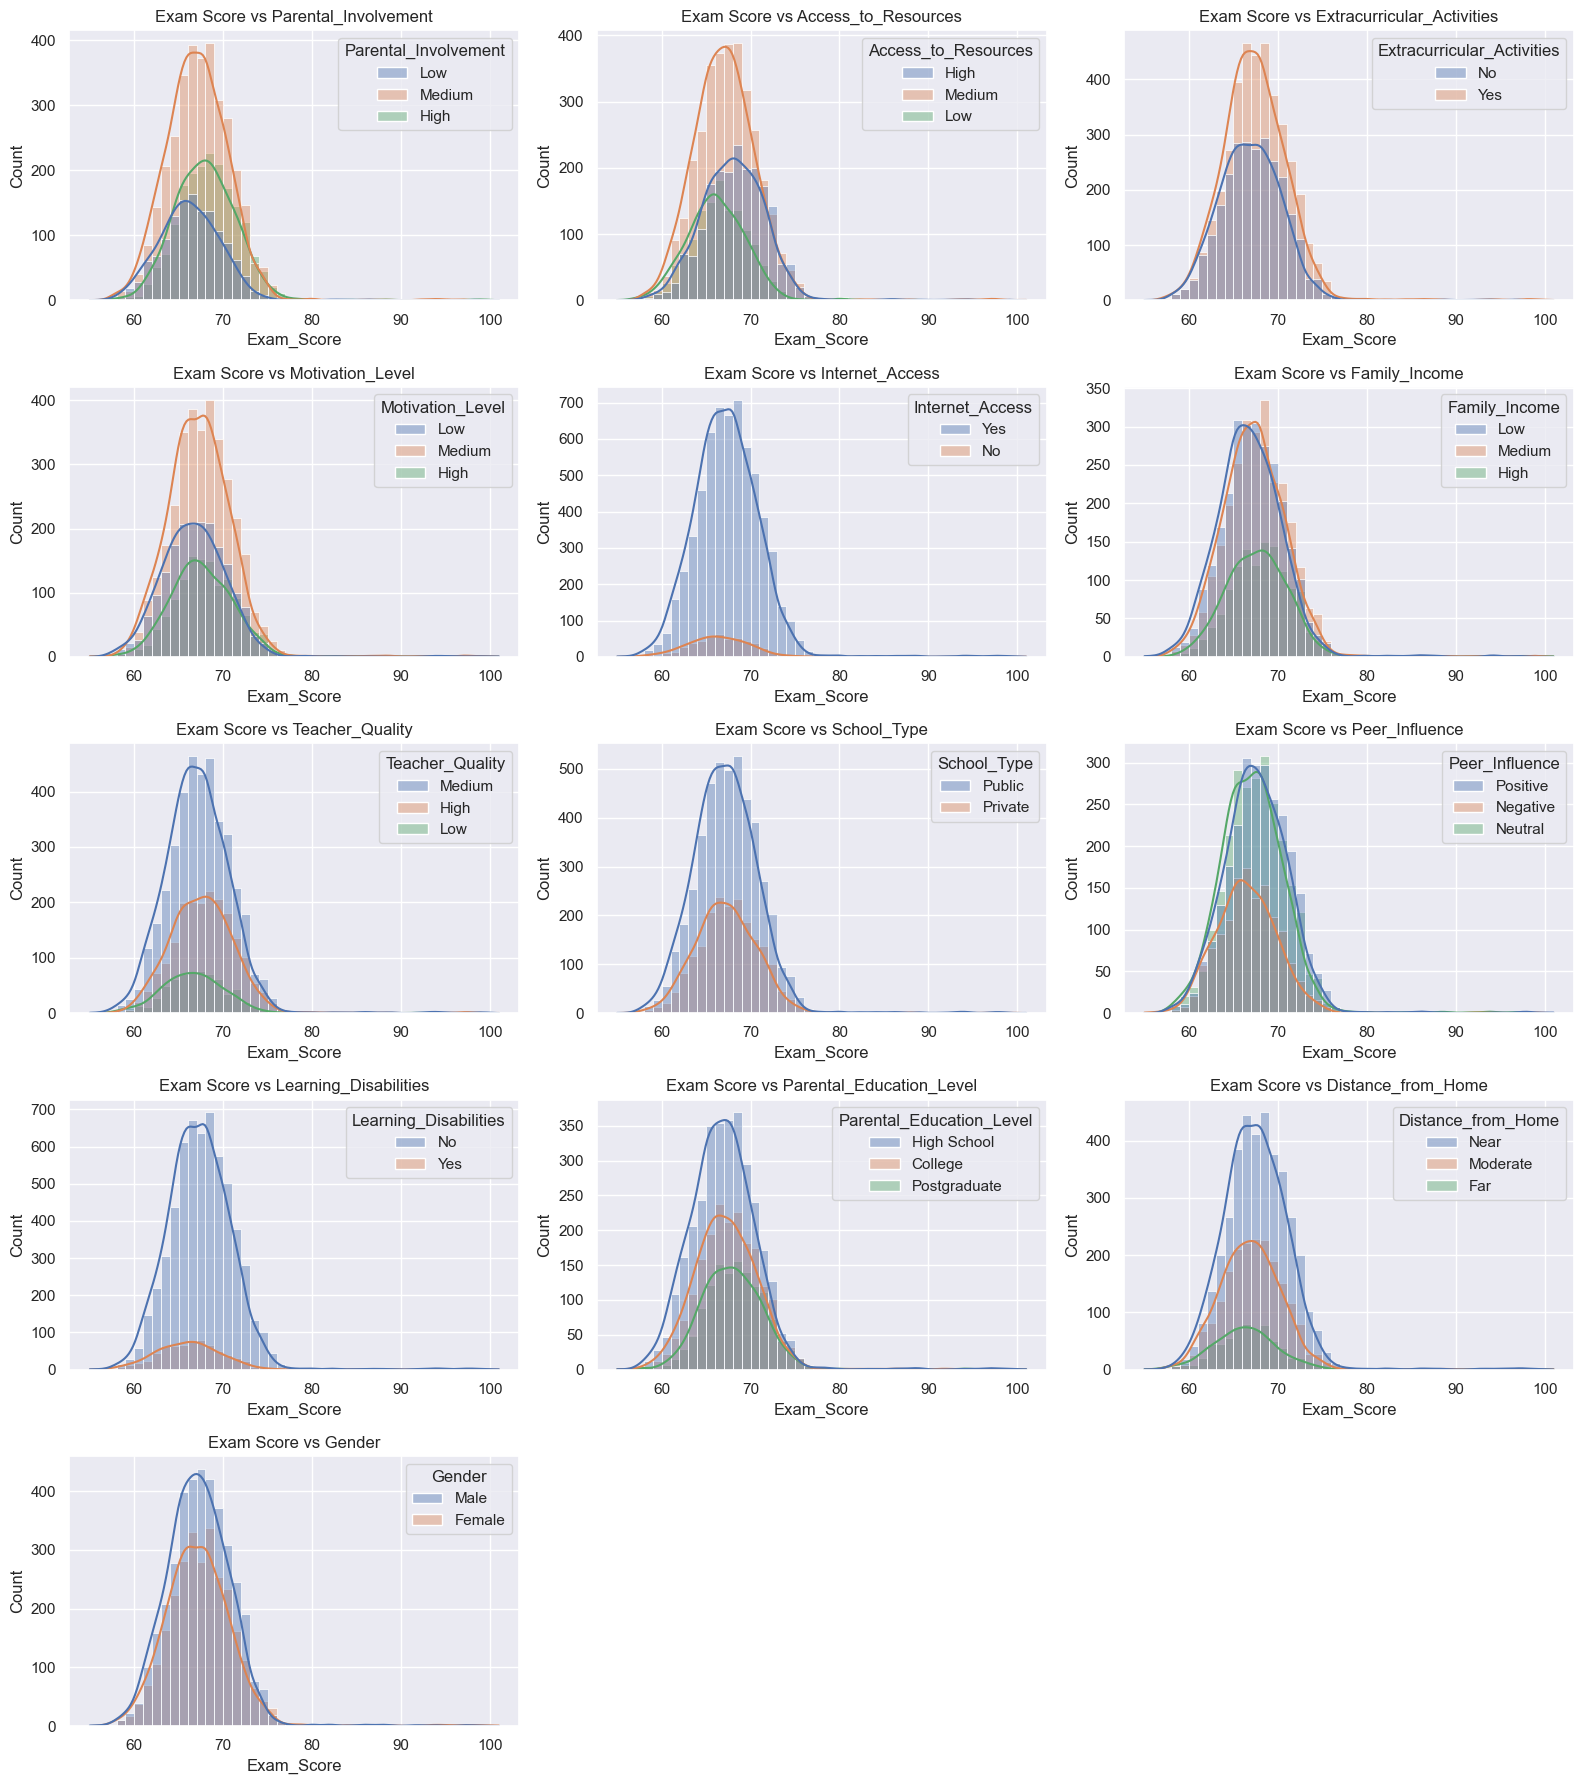

In [360]:
plt.figure(figsize=(16,18))
for i,col in enumerate(cat_features):
    plt.subplot(5,3,i+1)
    sns.histplot(data=data, x="Exam_Score",hue=col,alpha=0.4, kde=True, binwidth=1)
    plt.title("Exam Score vs " + col)
plt.tight_layout()
plt.show()

Insight: Berdasarkan grafik di atas, tidak terdapat korelasi signifikan yang terlihat antara beberapa fitur kategorikal dengan labelnya

### **5. Data Preprocessing**

Pada tahap ini, data preprocessing yang bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal dilakukan.

Berikut adalah tahapan-tahapan yang dilakukan:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Deteksi dan Penanganan Outlier
4. Encoding Data Kategorikal
5. Normalisasi atau Standarisasi Fitur

#### **Data Cleaning**

In [361]:
# Melihat kondisi awal dataset sebelum di-cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [362]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [363]:
# Menghapus baris dengan nilai Exam_Score lebih dari 100
data.drop(data[data["Exam_Score"] > 100].index, inplace=True)

# Menampilkan data yang memiliki nilai Exam_Score lebih dari 100 (jika ada)
data[data["Exam_Score"] > 100]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


Sudah tidak ada data yang memiliki nilai lebih dari 100, maka penghapusan baris telah berhasil dilakukan.

In [364]:
# Menangani Data Kosong (Missing Values)
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [365]:
# Menghapus baris dengan missing values pada kolom yang ditentukan
data.drop(data[pd.isnull(data["Teacher_Quality"])].index, inplace=True)
data.drop(data[pd.isnull(data["Parental_Education_Level"])].index, inplace=True)
data.drop(data[pd.isnull(data["Distance_from_Home"])].index, inplace=True)

Baris yang mengandung **missing values** pada kolom **Parental_Education_Level**, **Teacher_Quality**, dan **Distance_from_Home** dihapus karena **persentase data yang hilang sangat rendah** (sekitar 1-2% dari total data). Mengingat bahwa jumlahnya tidak signifikan, penghapusan baris ini tidak akan mempengaruhi kualitas analisis atau model, dan dapat menghindari potensi bias yang ditimbulkan jika kita melakukan imputasi. Dengan demikian, kita memilih untuk menjaga integritas data dengan menghapus baris yang memiliki nilai yang hilang.

In [366]:
# Mengecek ulang apakah masih ada missing values
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [367]:
# Menghapus Data Duplikat
# Mengecek apakah ada data yang duplikat
data.duplicated().sum()

0

Tidak ada data duplikat pada dataset.

In [368]:
data.shape

(6377, 20)

Sekarang jumlah baris data menjadi sebanyak 6377 baris.

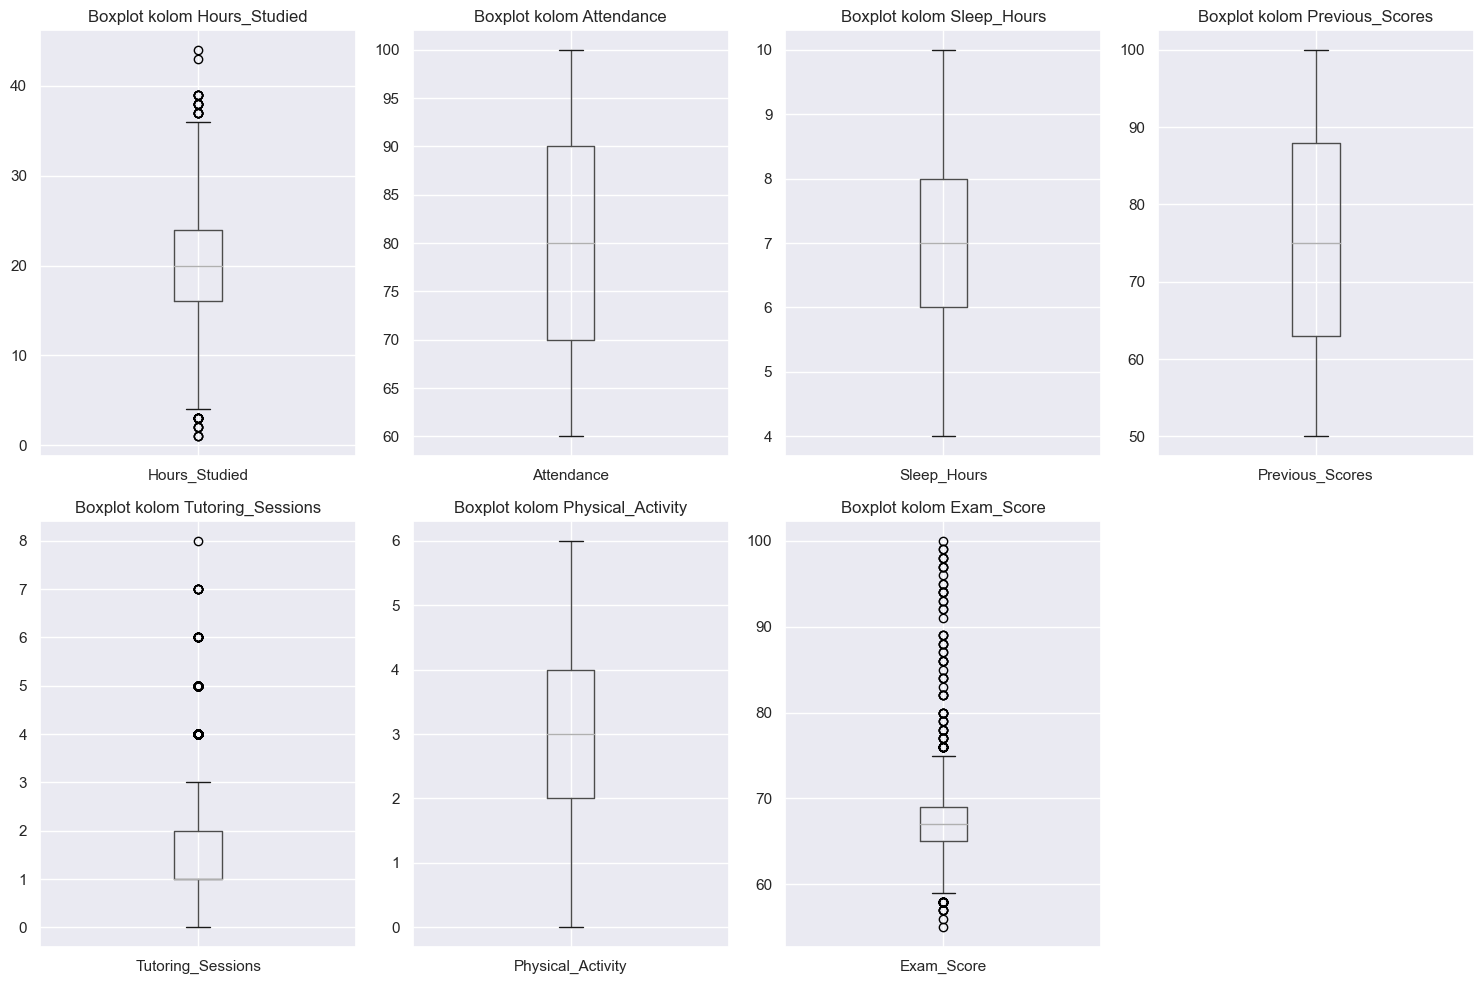

In [369]:
# Deteksi dan Penanganan Outlier
# Membuat boxplot untuk setiap kolom numerikal
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 4, i)
    data.boxplot(column=col)
    plt.title(f"Boxplot kolom {col}")
plt.tight_layout()
plt.show()

Berdasarkan boxplot yang ditampilkan, beberapa insight yang dapat diambil adalah:

1. **Exam_Score**: Nilai **101** sudah dihapus sebelumnya, sehingga tidak ada nilai yang melebihi batas maksimal 100.
2. **Hours_Studied**, **Tutoring_Sessions**, dan **Sleep_Hours** memiliki beberapa outlier, tetapi outlier ini bisa dianggap sah karena menunjukkan variasi data yang wajar.
3. Kolom **Attendance**, **Previous_Scores**, dan **Physical_Activity** tidak menunjukkan outlier yang signifikan.

**Kesimpulan:**
Outlier yang ditemukan telah ditangani, terutama nilai **101** pada **Exam_Score**. Secara keseluruhan, data kini siap untuk analisis lebih lanjut.

#### **Label Encoding**

Pada tahap **encoding** ini, kita melakukan dua jenis encoding untuk menangani fitur kategorikal:

1. **Nominal Encoding**:
   - Fitur seperti **Extracurricular_Activities**, **Internet_Access**, **School_Type**, **Learning_Disabilities**, dan **Gender** yang memiliki kategori **Yes/No** atau **Public/Private** diubah menjadi **nilai numerik** (0 dan 1) menggunakan **LabelEncoder**.
   - **Alasan**: Fitur ini bersifat **nominal**, di mana kategori tidak memiliki urutan atau hubungan yang perlu dipertahankan. Mengonversinya menjadi **0 dan 1** memudahkan model untuk memproses data kategorikal.

2. **Ordinal Encoding**:
   - Fitur seperti **Parental_Involvement**, **Access_to_Resources**, **Motivation_Level**, **Family_Income**, **Teacher_Quality**, **Peer_Influence**, **Parental_Education_Level**, dan **Distance_from_Home** yang memiliki urutan alami diubah menjadi **nilai numerik** sesuai dengan urutan kategori yang ada.
   - **Alasan**: Fitur-fitur ini **memiliki urutan** (seperti **Low, Medium, High**) yang penting untuk dipertahankan. Dengan memberikan nilai numerik berdasarkan urutan, kita menjaga **makna dan hubungan antar kategori** yang dapat berpengaruh pada model prediksi.

Dengan cara ini, kita mengonversi fitur kategorikal menjadi format yang dapat dipahami oleh model tanpa kehilangan informasi penting yang terkandung dalam data.

In [370]:
# Encoding Data Kategorikal
# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# Melihat detail value fitur categorical
for column in cat_features:
    print(f"This is the detail value of {column}:")
    print(data[column].value_counts())
    print("\n")

This is the detail value of Parental_Involvement:
Parental_Involvement
Medium    3251
High      1836
Low       1290
Name: count, dtype: int64


This is the detail value of Access_to_Resources:
Access_to_Resources
Medium    3203
High      1900
Low       1274
Name: count, dtype: int64


This is the detail value of Extracurricular_Activities:
Extracurricular_Activities
Yes    3806
No     2571
Name: count, dtype: int64


This is the detail value of Motivation_Level:
Motivation_Level
Medium    3237
Low       1863
High      1277
Name: count, dtype: int64


This is the detail value of Internet_Access:
Internet_Access
Yes    5893
No      484
Name: count, dtype: int64


This is the detail value of Family_Income:
Family_Income
Low       2582
Medium    2566
High      1229
Name: count, dtype: int64


This is the detail value of Teacher_Quality:
Teacher_Quality
Medium    3826
High      1904
Low        647
Name: count, dtype: int64


This is the detail value of School_Type:
School_Type
Public     44

In [371]:
# Menangani encoding untuk fitur nominal (Yes/No, Public/Private)
nominal_columns = ["Extracurricular_Activities", "Internet_Access", "School_Type", "Learning_Disabilities", "Gender"]
for column in nominal_columns:
    data[column] = label_encoder.fit_transform(data[column])  # Yes = 1, No = 0, Public = 1, Private = 0

# Menangani encoding untuk fitur ordinal
ordinal_columns = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", 
                   "Teacher_Quality", "Peer_Influence", "Parental_Education_Level", "Distance_from_Home"]

for column in ordinal_columns:
    if data[column].str.contains("Low").any():
        levels = {"Low": 0, "Medium": 1, "High": 2}
    elif data[column].str.contains("Negative").any():
        levels = {"Negative": -1, "Neutral": 0, "Positive": 1}
    elif data[column].str.contains("Near").any():
        levels = {"Near": 0, "Moderate": 1, "Far": 2}
    else:
        levels = {"High School": 0, "College": 1, "Postgraduate": 2}

    data[column] = data[column].map(levels)

# Menampilkan hasil setelah encoding
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,1,3,0,0,0,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,-1,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,0,4,0,2,0,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,-1,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,0,4,0,1,0,0,70


In [372]:
for column in cat_features:
    print(f"This is the detail value of {column}:")
    print(data[column].value_counts())
    print("\n")

This is the detail value of Parental_Involvement:
Parental_Involvement
1    3251
2    1836
0    1290
Name: count, dtype: int64


This is the detail value of Access_to_Resources:
Access_to_Resources
1    3203
2    1900
0    1274
Name: count, dtype: int64


This is the detail value of Extracurricular_Activities:
Extracurricular_Activities
1    3806
0    2571
Name: count, dtype: int64


This is the detail value of Motivation_Level:
Motivation_Level
1    3237
0    1863
2    1277
Name: count, dtype: int64


This is the detail value of Internet_Access:
Internet_Access
1    5893
0     484
Name: count, dtype: int64


This is the detail value of Family_Income:
Family_Income
0    2582
1    2566
2    1229
Name: count, dtype: int64


This is the detail value of Teacher_Quality:
Teacher_Quality
1    3826
2    1904
0     647
Name: count, dtype: int64


This is the detail value of School_Type:
School_Type
1    4433
0    1944
Name: count, dtype: int64


This is the detail value of Peer_Influence:
Peer

In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6377 non-null   int64
 1   Attendance                  6377 non-null   int64
 2   Parental_Involvement        6377 non-null   int64
 3   Access_to_Resources         6377 non-null   int64
 4   Extracurricular_Activities  6377 non-null   int32
 5   Sleep_Hours                 6377 non-null   int64
 6   Previous_Scores             6377 non-null   int64
 7   Motivation_Level            6377 non-null   int64
 8   Internet_Access             6377 non-null   int32
 9   Tutoring_Sessions           6377 non-null   int64
 10  Family_Income               6377 non-null   int64
 11  Teacher_Quality             6377 non-null   int64
 12  School_Type                 6377 non-null   int32
 13  Peer_Influence              6377 non-null   int64
 14  Physical_Acti

Proses encoding sudah berhasil dilakukan.

#### **Feature Extraction**

In [374]:
data["Parental_Support"] = data["Parental_Involvement"] * data["Parental_Education_Level"]

**Feature Extraction: Parental_Support**

Fitur Parental_Support dibuat dengan mengalikan Parental_Involvement (keterlibatan orang tua) dan Parental_Education_Level (tingkat pendidikan orang tua). Semakin tinggi keterlibatan orang tua dan tingkat pendidikan mereka, semakin besar pengaruhnya terhadap performa akademis anak. Dengan fitur ini, kami menggabungkan kedua faktor untuk menggambarkan pengaruh orang tua terhadap pendidikan anak secara lebih efektif.

In [375]:
data["Resource_Impact"] = data["Access_to_Resources"] + data["Teacher_Quality"]

**Feature Extraction: Resource_Impact**

Fitur Resource_Impact dibuat dengan menjumlahkan Access_to_Resources (akses ke sumber daya) dan Teacher_Quality (kualitas guru). Ini menggambarkan pengaruh gabungan antara ketersediaan sumber daya dan kualitas pengajaran terhadap performa akademis siswa.

In [376]:
data['Strong_Support_System'] = ((data['Parental_Involvement'] > 1) & 
                               (data['Teacher_Quality'] == 2) & 
                               (data['Access_to_Resources'] > 1)).astype(int)

**Feature Extraction: Strong_Support_System**

Fitur Strong_Support_System menunjukkan apakah lingkungan siswa mendukung pendidikan mereka, dengan memeriksa tiga kondisi: Parental_Involvement lebih dari 1, Teacher_Quality sama dengan 2, dan Access_to_Resources lebih dari 1. Jika semua kondisi terpenuhi, nilai fitur ini adalah 1 (lingkungan mendukung), jika tidak, 0 (lingkungan tidak mendukung).

In [377]:
data['Study_Motivation'] = data['Hours_Studied'] * data['Motivation_Level']

**Feature Extraction: Study_Motivation**

Fitur Study_Motivation dibuat dengan mengalikan Hours_Studied (jam belajar) dan Motivation_Level (tingkat motivasi). Ini menggambarkan seberapa besar motivasi belajar siswa berdasarkan waktu yang mereka habiskan untuk belajar dan tingkat motivasi mereka.

In [378]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Parental_Support,Resource_Impact,Strong_Support_System,Study_Motivation
0,23,84,0,2,0,7,73,0,1,0,0,1,1,1,3,0,0,0,1,67,0,3,0,0
1,19,64,0,1,0,8,59,0,1,2,1,1,1,-1,4,0,1,1,0,61,0,2,0,0
2,24,98,1,1,1,7,91,1,1,2,1,1,1,0,4,0,2,0,1,74,2,2,0,24
3,29,89,0,1,1,8,98,1,1,1,1,1,1,-1,4,0,0,1,1,71,0,2,0,29
4,19,92,1,1,1,6,65,1,1,3,1,2,1,0,4,0,1,0,0,70,1,3,0,19


#### **Normalisasi/Standarisasi Fitur**

Pada tahap ini, fitur numerik seperti **Hours_Studied**, **Attendance**, dan lainnya dinormalisasi menggunakan **MinMaxScaler** agar memiliki rentang [0, 1], yang penting untuk model yang sensitif terhadap skala data. Sementara itu, fitur hasil encoding seperti **Gender**, **School_Type**, dan lainnya tidak dinormalisasi karena mereka sudah berupa nilai numerik yang mewakili kategori, sehingga normalisasi tidak diperlukan. Normalisasi hanya diterapkan pada fitur numerik kontinu yang memiliki rentang nilai yang berbeda, seperti **Hours_Studied** dan **Attendance**, sementara kolom target **Exam_Score** tidak dinormalisasi karena itu adalah target yang tidak perlu diubah.

#### **Multicollinearity**

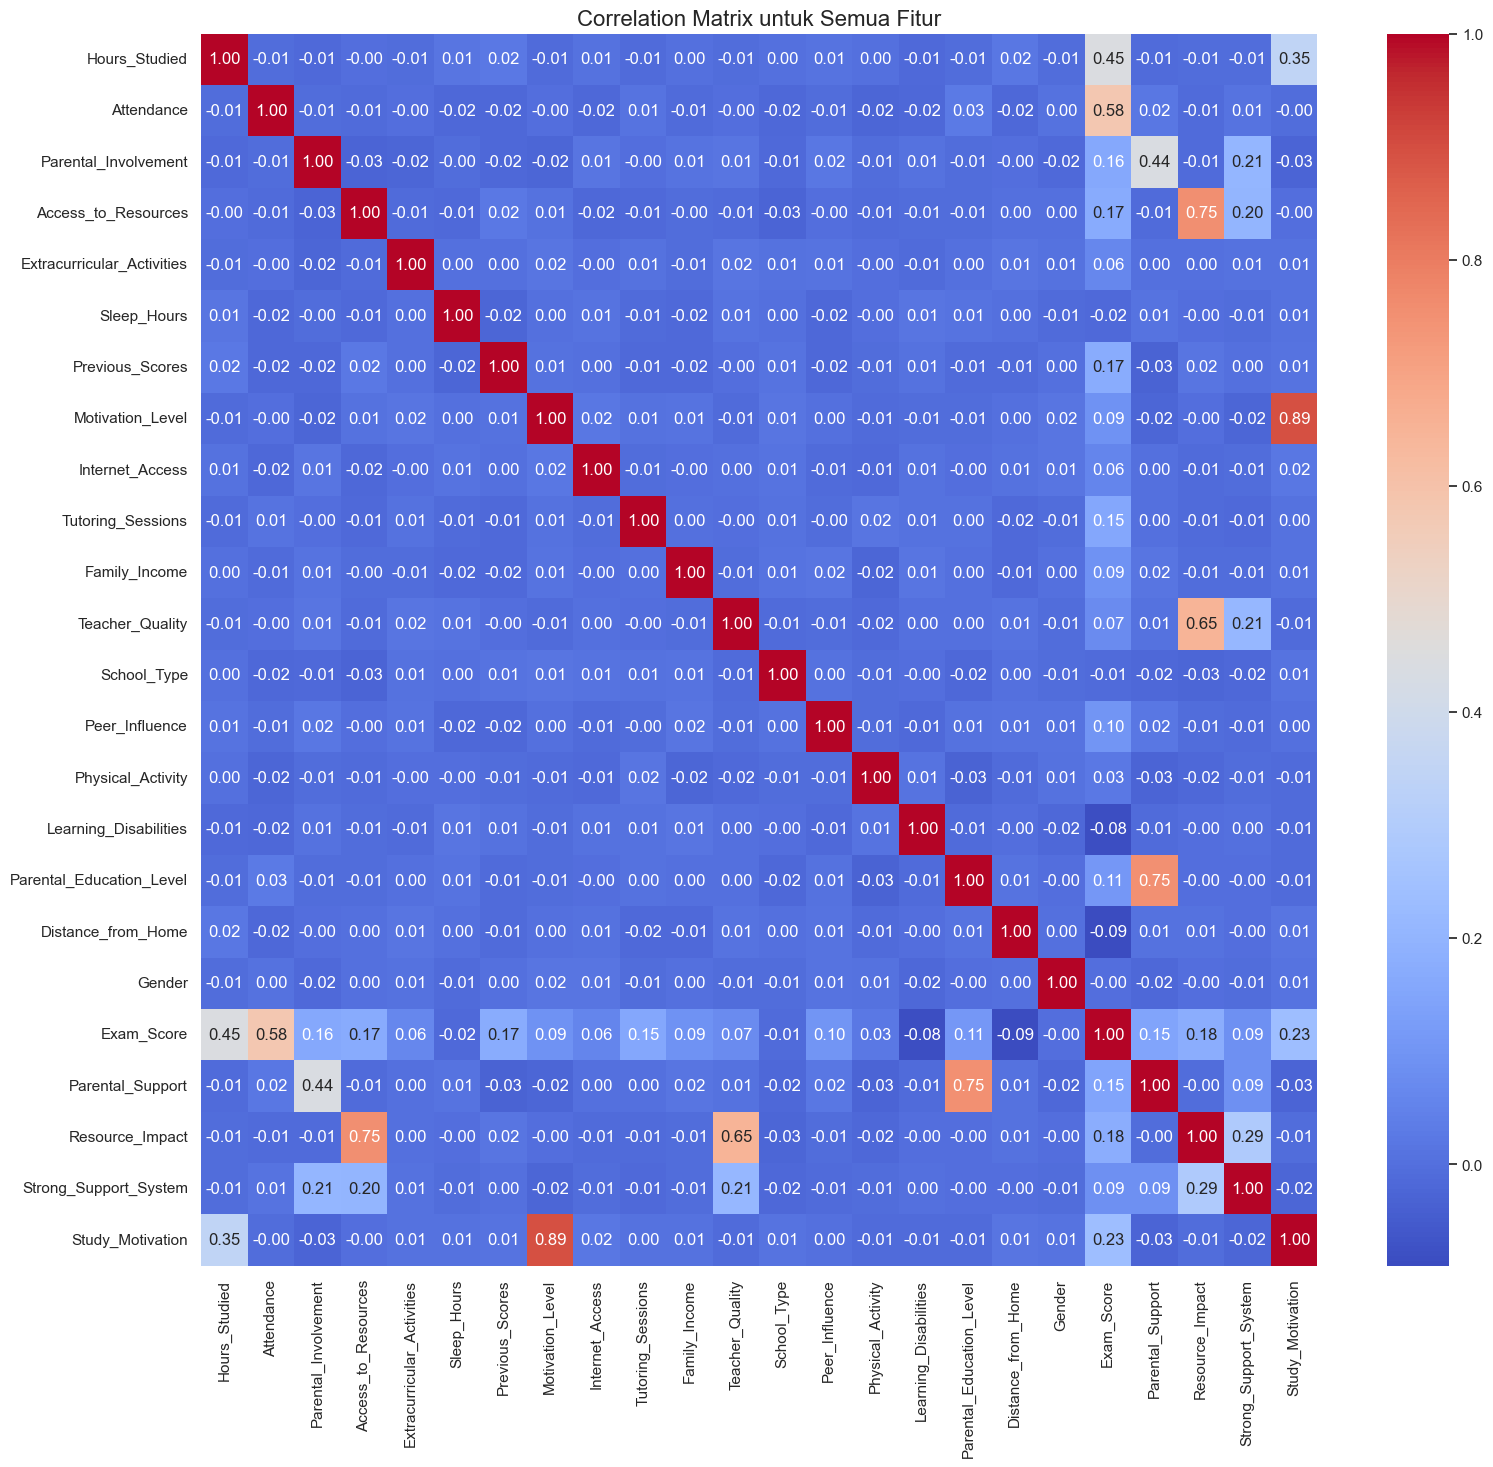

In [379]:
# Visualisasi Korelasi untuk Semua Fitur
correlation_matrix = data.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix untuk Semua Fitur", fontsize=16)
plt.show()


Dari **Correlation Matrix** di atas, berikut adalah beberapa analisis terkait dengan **multikolinearitas** pada dataset ini, dengan fitur target **Exam_Score**:

1. **Hubungan antara `Exam_Score` dan fitur lainnya**:
   - **`Attendance` (58%)** menunjukkan korelasi positif yang moderat dengan **Exam_Score**, yang menunjukkan bahwa tingkat kehadiran dapat mempengaruhi nilai ujian, namun pengaruhnya tidak terlalu besar.
   - **`Hours_Studied` (45%)** juga menunjukkan korelasi positif moderat, yang mengindikasikan bahwa semakin banyak waktu yang dihabiskan untuk belajar, semakin tinggi kemungkinan nilai ujian yang didapatkan oleh siswa.
   - **`Study_Motivation` (23%)** menunjukkan korelasi positif yang lebih rendah dengan **Exam_Score**, namun tetap menunjukkan adanya hubungan yang positif antara motivasi belajar dan nilai ujian.

2. **Koreksi pada fitur numerikal lainnya**:
   - Sebagian besar fitur dalam matriks korelasi tidak menunjukkan korelasi yang sangat tinggi satu sama lain, kecuali beberapa fitur yang terlihat memiliki korelasi tinggi:
     - **`Parental_Involvement` dan `Parental_Support`** memiliki korelasi tinggi (0.75), yang menunjukkan bahwa kedua variabel ini mungkin mengukur konsep yang sangat mirip atau memiliki keterkaitan yang erat.
     - **`Family_Income` dan `Parental_Education_Level`** juga menunjukkan korelasi yang lebih tinggi (0.65), yang mungkin menunjukkan keterkaitan antara tingkat pendidikan orang tua dan pendapatan keluarga.

3. **Indikasi multikolinearitas**:
   - **`Study_Motivation`** dan **`Previous_Scores`** memiliki kolerasi 0.89, yang merupakan kolerasi yang sangat tinggi. Hal ini menunjukkan bahwa kedua fitur ini saling tumpang tindih dalam informasi yang mereka sediakan dan dapat menyebabkan masalah multikolinearitas yang lebih serius dalam model.

4. **Langkah Penanganan Multikolinearitas:**:
   - Untuk menangani masalah multikolinearitas ini, kami akan menghapus salah satu dari dua fitur yang sangat berkorelasi, yaitu **`Study_Motivation`** atau **`Previous_Scores`**. Pilihan ini bergantung pada fitur mana yang lebih relevan dengan Exam_Score dan yang lebih mudah diinterpretasi.

1. Penanganan Step 1: fitur Study_Motivation berkolerasi sangat tinggi dengan fitur Motivational_Level. Namun, karena fitur Study_Motivation memiliki korelasi cukup tinggi dengan Exam_Score (0.23), yang mana lebih besar dibanding Motivation_Level dengan Exam_Score (0.09), maka fitur yang dipilih untuk dipertahankan adalah Study_Motivation dan fitur Motivotional_Level akan dihapus.

In [380]:
# Menghapus fitur 'Motivation_Level' dari data
data = data.drop(columns=['Motivation_Level'])

2. Penanganan Step 2: fitur Access_to_Resources berkolerasi tinggi dengan fitur Resource_Impact. Namun, karena fitur Resource_Impact memiliki korelasi lebih tinggi dengan Exam_Score (0.18), yang mana sedikit lebih besar dibanding Access_to_Resources dengan Exam_Score (0.17), maka fitur yang dipilih untuk dipertahankan adalah Resource_Impact dan fitur Access_to_Resource akan dihapus. Hal yang sama juga akan terjadi kepada fitur Teacher_Quality yang berkolerasi dengan fitur Resource_Impact.

In [381]:
# Menghapus fitur 'Access_to_Resources' dan 'Teacher_Quality' dari data
data = data.drop(columns=['Access_to_Resources'])
data = data.drop(columns=['Teacher_Quality'])

3. Penanganan Step 3: fitur Parental_Support berkolerasi tinggi dengan fitur Parental_Education_Level. Namun, karena fitur Parental_Support memiliki korelasi lebih tinggi dengan Exam_Score (0.15), yang mana sedikit lebih besar dibanding Parental_Education_Level dengan Exam_Score (0.11), maka fitur yang dipilih untuk dipertahankan adalah Parental_Support dan fitur Parental_Education_Level akan dihapus.

In [382]:
# Menghapus fitur 'Parental_Education_Level' dari data
data = data.drop(columns=['Parental_Education_Level'])

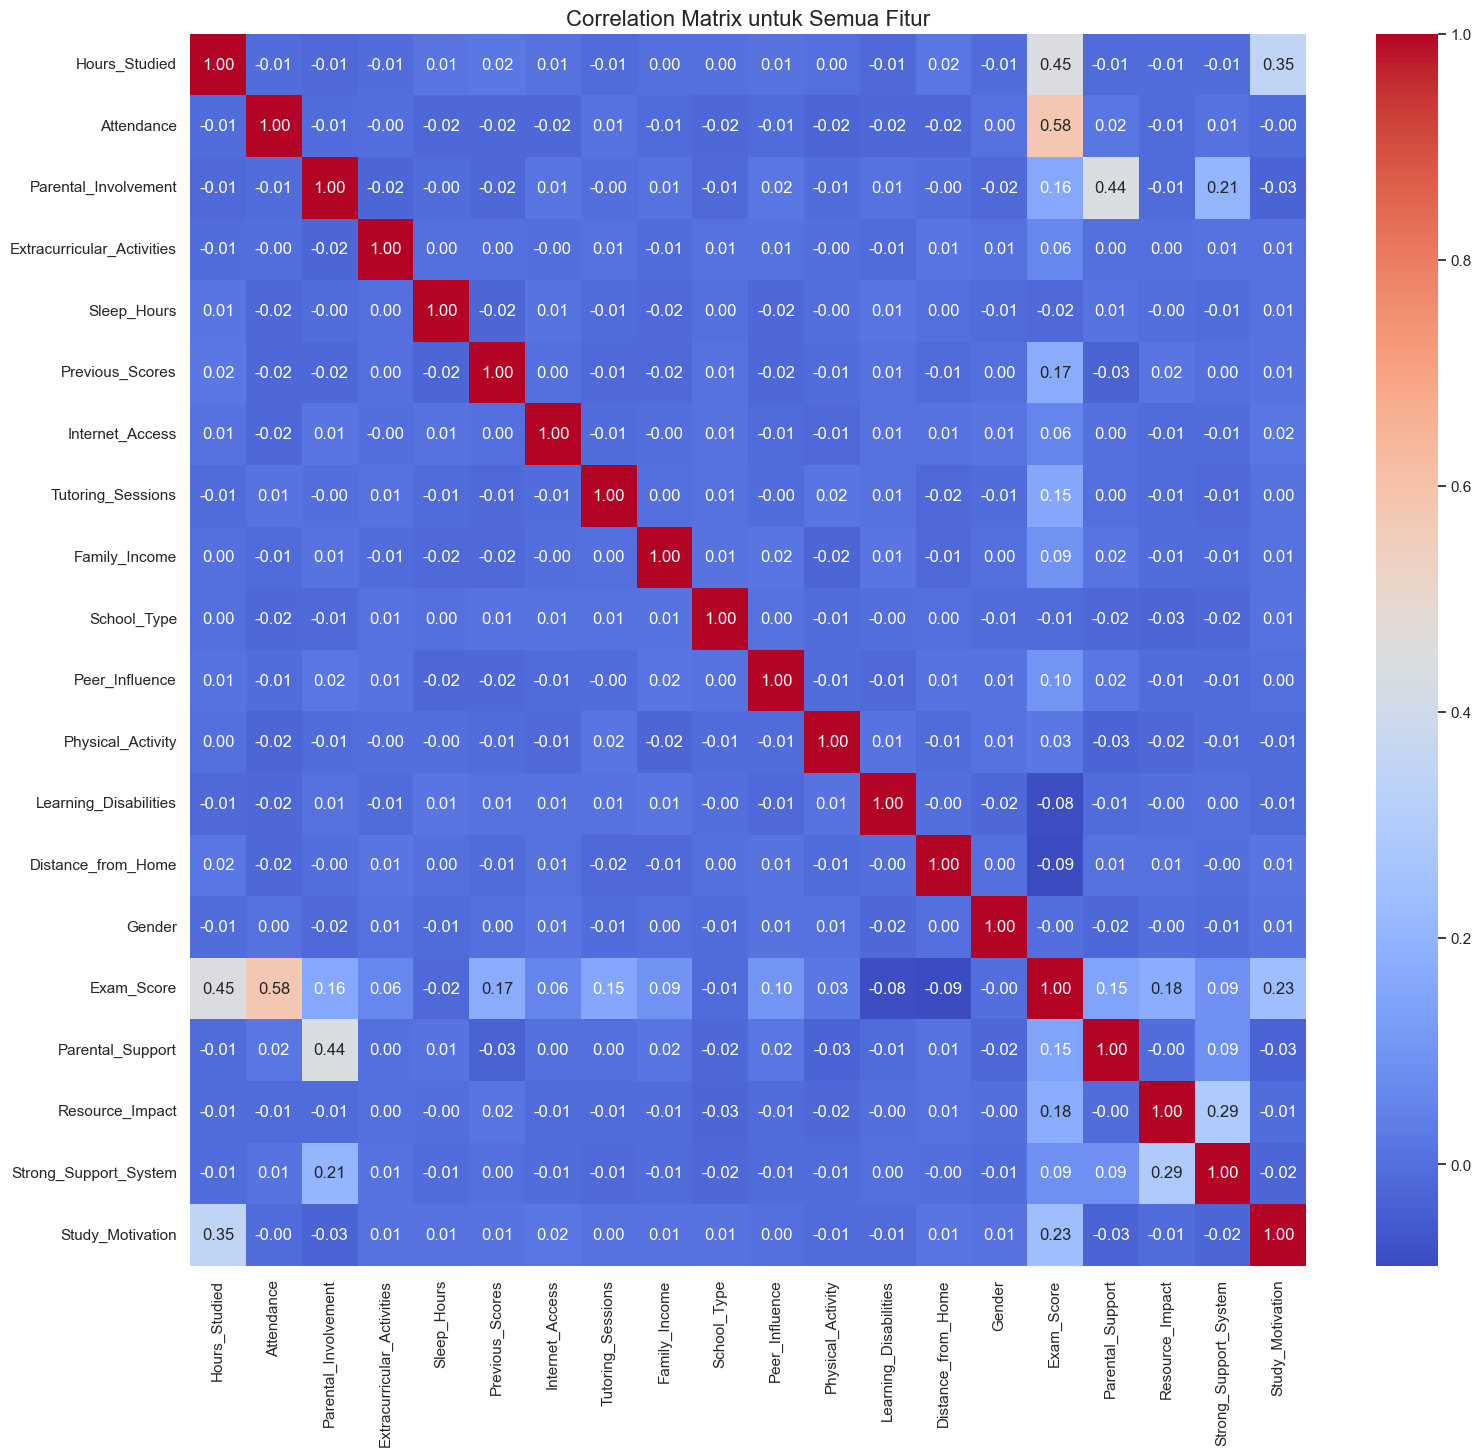

In [383]:
# Membuat Visualisasi Korelasi lagi untuk mengecek multikolinearitas lagi
correlation_matrix = data.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix untuk Semua Fitur", fontsize=16)
plt.show()


#### **Feature Selection**

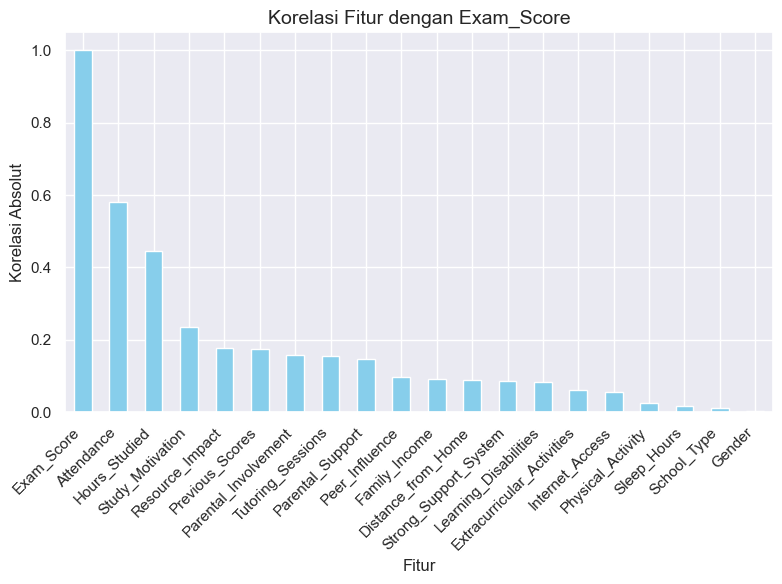

In [384]:
# Menampilkan correlation matrix untuk target 'Exam_Score' dan fitur lainnya
target_corr = correlation_matrix['Exam_Score'].apply(abs).sort_values(ascending=False)

# Grafik urutan korelasi fitur dengan Exam_Score
plt.figure(figsize=(8, 6))
target_corr.plot(kind='bar', color='skyblue')
plt.title('Korelasi Fitur dengan Exam_Score', fontsize=14)
plt.xlabel('Fitur', fontsize=12)
plt.ylabel('Korelasi Absolut', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Berdasarkan hasil tersebut, kita dapat melihat bahwa:

1. **Attendance** memiliki korelasi tertinggi dengan **Exam_Score** (0.58), diikuti oleh **Hours_Studied** (0.45) dan **Study_Motivation** (0.23).
2. Fitur-fitur lain seperti **Previous_Scores** dan **Tutoring_Sessions** menunjukkan korelasi yang lebih rendah dengan **Exam_Score**, yang mungkin menunjukkan pengaruh yang lebih kecil terhadap hasil ujian.
3. Fitur **Sleep_Hours**, **Physical_Activity**, dan lainnya memiliki korelasi yang sangat rendah, yang menunjukkan bahwa mereka mungkin tidak terlalu berpengaruh terhadap **Exam_Score** dalam konteks ini.

In [385]:
# Menampilkan fitur yang memiliki korelasi tinggi dengan target
print("Fitur yang berkorelasi dengan Exam_Score:\n", target_corr)

Fitur yang berkorelasi dengan Exam_Score:
 Exam_Score                    1.000000
Attendance                    0.581664
Hours_Studied                 0.446174
Study_Motivation              0.234258
Resource_Impact               0.177266
Previous_Scores               0.173635
Parental_Involvement          0.159087
Tutoring_Sessions             0.153986
Parental_Support              0.146924
Peer_Influence                0.098271
Family_Income                 0.092913
Distance_from_Home            0.089611
Strong_Support_System         0.087150
Learning_Disabilities         0.083941
Extracurricular_Activities    0.062319
Internet_Access               0.056219
Physical_Activity             0.025260
Sleep_Hours                   0.016314
School_Type                   0.011833
Gender                        0.003369
Name: Exam_Score, dtype: float64


In [386]:
# Menyaring fitur yang berkorelasi rendah dengan target (Exam_Score)
# Mengambil semua fitur dari X yang memiliki korelasi lebih besar dari threshold tertentu (misalnya 0.1)
threshold = 0.05
selected_features = target_corr[target_corr > threshold].index.tolist()

# Memastikan 'Exam_Score' tidak ada dalam selected_features
selected_features = [feature for feature in selected_features if feature != 'Exam_Score']

# Memilih hanya fitur yang terpilih
X_selected = X[selected_features]

# Menampilkan hasil fitur terpilih
print("Fitur yang terpilih:", selected_features)


Fitur yang terpilih: ['Attendance', 'Hours_Studied', 'Study_Motivation', 'Resource_Impact', 'Previous_Scores', 'Parental_Involvement', 'Tutoring_Sessions', 'Parental_Support', 'Peer_Influence', 'Family_Income', 'Distance_from_Home', 'Strong_Support_System', 'Learning_Disabilities', 'Extracurricular_Activities', 'Internet_Access']


In [387]:
# Membuat instance MinMaxScaler
scaler = MinMaxScaler()

# Pisahkan target (Exam_Score) dari fitur lainnya
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

# Tentukan fitur numerik yang perlu dinormalisasi
numerical_features = [
    'Attendance', 'Hours_Studied', 'Study_Motivation', 'Previous_Scores', 'Tutoring_Sessions'
]

# Menormalisasi fitur numerik (kecuali Exam_Score)
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Gabungkan kembali fitur yang sudah dinormalisasi dengan target
data = pd.concat([y, X], axis=1)

# Tampilkan hasil data
data.head()

,Exam_Score,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Distance_from_Home,Gender,Parental_Support,Resource_Impact,Strong_Support_System,Study_Motivation
0,67,0.511628,0.600,0,0,7,0.46,1,0.000,0,1,1,3,0,0,1,0,3,0,0.000000
1,61,0.418605,0.100,0,0,8,0.18,1,0.250,1,1,-1,4,0,1,0,0,2,0,0.000000
2,74,0.534884,0.950,1,1,7,0.82,1,0.250,1,1,0,4,0,0,1,2,2,0,0.307692
3,71,0.651163,0.725,0,1,8,0.96,1,0.125,1,1,-1,4,0,1,1,0,2,0,0.371795
4,70,0.418605,0.800,1,1,6,0.30,1,0.375,1,1,0,4,0,0,0,1,3,0,0.243590


In [388]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Attendance                  6377 non-null   float64
 1   Hours_Studied               6377 non-null   float64
 2   Study_Motivation            6377 non-null   float64
 3   Resource_Impact             6377 non-null   int64  
 4   Previous_Scores             6377 non-null   float64
 5   Parental_Involvement        6377 non-null   int64  
 6   Tutoring_Sessions           6377 non-null   float64
 7   Parental_Support            6377 non-null   int64  
 8   Peer_Influence              6377 non-null   int64  
 9   Family_Income               6377 non-null   int64  
 10  Distance_from_Home          6377 non-null   int64  
 11  Strong_Support_System       6377 non-null   int32  
 12  Learning_Disabilities       6377 non-null   int32  
 13  Extracurricular_Activities  6377 non-n

#### **Data Splitting**

In [389]:
# Pisahkan fitur (X) dan target (y)
X = X_selected  # Gunakan X_selected sebagai X untuk pelatihan dan pengujian
y = data['Exam_Score']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(5101, 15), y_train=(5101,)
Test set shape: X_test=(1276, 15), y_test=(1276,)


In [390]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Attendance                  6377 non-null   float64
 1   Hours_Studied               6377 non-null   float64
 2   Study_Motivation            6377 non-null   float64
 3   Resource_Impact             6377 non-null   int64  
 4   Previous_Scores             6377 non-null   float64
 5   Parental_Involvement        6377 non-null   int64  
 6   Tutoring_Sessions           6377 non-null   float64
 7   Parental_Support            6377 non-null   int64  
 8   Peer_Influence              6377 non-null   int64  
 9   Family_Income               6377 non-null   int64  
 10  Distance_from_Home          6377 non-null   int64  
 11  Strong_Support_System       6377 non-null   int32  
 12  Learning_Disabilities       6377 non-null   int32  
 13  Extracurricular_Activities  6377 non-n

In [391]:
X.head(10)

,Attendance,Hours_Studied,Study_Motivation,Resource_Impact,Previous_Scores,Parental_Involvement,Tutoring_Sessions,Parental_Support,Peer_Influence,Family_Income,Distance_from_Home,Strong_Support_System,Learning_Disabilities,Extracurricular_Activities,Internet_Access
0,0.600,0.511628,0.000000,3,0.46,0,0.000,0,1,0,0,0,0,0,1
1,0.100,0.418605,0.000000,2,0.18,0,0.250,0,-1,1,1,0,0,0,1
2,0.950,0.534884,0.307692,2,0.82,1,0.250,2,0,1,0,0,0,1,1
3,0.725,0.651163,0.371795,2,0.96,0,0.125,0,-1,1,1,0,0,1,1
4,0.800,0.418605,0.243590,3,0.30,1,0.375,1,0,1,0,0,0,1,1
5,0.700,0.418605,0.243590,2,0.78,1,0.375,2,1,1,0,0,0,1,1
6,0.600,0.651163,0.000000,1,0.36,1,0.125,0,0,0,1,0,0,1,1
7,0.450,0.558140,0.320513,4,0.00,0,0.125,0,-1,2,2,0,0,1,1
8,0.850,0.372093,0.435897,2,0.60,1,0.000,1,0,1,0,0,0,0,1
9,0.950,0.511628,0.294872,3,0.42,1,0.000,0,1,2,1,0,0,1,1


### **6. Model Deployment**

Model yang digunakan untuk regresi:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regression
- Random Forest Regression
- XGBoost Regression

#### **Hyperparameter Tuning**

Menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik

In [392]:
# Model Training
lin_reg = LinearRegression().fit(X_train, y_train)

# Hyperparameter tuning for Ridge Regression
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
print("Best parameters for Ridge Regression:", ridge_grid_search.best_params_)

# Hyperparameter tuning for Lasso Regression
lasso_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 10.0]
}
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)
print("Best parameters for Lasso Regression:", lasso_grid_search.best_params_)

# Decision Tree Regressor (using previously found best parameters)
# Best parameters for Decision Tree Regressor: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=15, min_samples_split=2, min_samples_leaf=10)
dt_reg.fit(X_train, y_train)

# Random Forest Regressor (using previously found best parameters)
# Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
rf_reg = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=4)
rf_reg.fit(X_train, y_train)

# XGBoost Regressor (using previously found best parameters)
# Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.7
)
xgb_reg.fit(X_train, y_train)

# Train Ridge and Lasso using the best parameters found
best_ridge_reg = ridge_grid_search.best_estimator_
best_lasso_reg = lasso_grid_search.best_estimator_

# Retrain Ridge and Lasso models with tuned hyperparameters
best_ridge_reg.fit(X_train, y_train)
best_lasso_reg.fit(X_train, y_train)

print("Model training with tuned hyperparameters completed.")


Best parameters for Ridge Regression: {'alpha': 0.1}
Best parameters for Lasso Regression: {'alpha': 0.1}
Model training with tuned hyperparameters completed.


Note: sebelumnya sudah melakukan tuning pada model DT, RF dan XGBoost. Namun untuk mempercepat proses compile maka langsung digunakan saja best parameter yang sudah diketahuinya.

In [393]:
# # Model Training
# # Train each regressor separately
# lin_reg = LinearRegression().fit(X_train, y_train)
# ridge_reg = Ridge(alpha=1.0).fit(X_train, y_train)
# lasso_reg = Lasso(alpha=0.1).fit(X_train, y_train)

# dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5).fit(X_train, y_train)

# rf_reg = RandomForestRegressor(random_state=42, n_estimators=100).fit(X_train, y_train)

# xgb_reg = xgb.XGBRegressor(
#     objective='reg:squarederror',  # Regression task (squared error loss)
#     eval_metric='rmse',            # Root Mean Squared Error as evaluation metric
#     n_estimators=100,             # Number of boosting rounds (trees)
#     learning_rate=0.1,            # Step size shrinkage
#     max_depth=6                   # Maximum depth of a tree
# )
# xgb_reg.fit(X_train, y_train)

# print("Model training selesai.")

Note: code yang di atas ini kalo tanpa tuning semuanya.

### **7. Model Evaluation**

Linear Regression

In [394]:
# Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test)
print("==== Linear Regression ====")
print("Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lin_reg))
print("MSE:", mean_squared_error(y_test, y_pred_lin_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))
print("R²:", r2_score(y_test, y_pred_lin_reg))

==== Linear Regression ====
Evaluation Metrics:
MAE: 0.59818965444861
MSE: 4.2750232943984745
RMSE: 2.0676129459834773
R²: 0.7268984389821669


#### **Ridge Regression**

In [395]:
# # Ridge Regression
# y_pred_ridge_reg = ridge_reg.predict(X_test)
# print("==== Ridge Regression ====")
# print("Evaluation Metrics:")
# print("MAE:", mean_absolute_error(y_test, y_pred_ridge_reg))
# print("MSE:", mean_squared_error(y_test, y_pred_ridge_reg))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_reg)))
# print("R²:", r2_score(y_test, y_pred_ridge_reg))

In [396]:
# Ridge Regression dengan model yang sudah dituning
y_pred_ridge_reg = best_ridge_reg.predict(X_test)

print("==== Ridge Regression ====")
print("Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge_reg))
print("MSE:", mean_squared_error(y_test, y_pred_ridge_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_reg)))
print("R²:", r2_score(y_test, y_pred_ridge_reg))

==== Ridge Regression ====
Evaluation Metrics:
MAE: 0.5983406270882303
MSE: 4.275494792097004
RMSE: 2.0677269626565797
R²: 0.7268683182673503


#### **Lasso Regression**

In [397]:
# # Lasso Regression
# y_pred_lasso_reg = lasso_reg.predict(X_test)
# print("==== Lasso Regression ====")
# print("Evaluation Metrics:")
# print("MAE:", mean_absolute_error(y_test, y_pred_lasso_reg))
# print("MSE:", mean_squared_error(y_test, y_pred_lasso_reg))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso_reg)))
# print("R²:", r2_score(y_test, y_pred_lasso_reg))

In [398]:
# Lasso Regression dengan model yang sudah dituning
y_pred_lasso_reg = best_lasso_reg.predict(X_test)

print("==== Lasso Regression ====")
print("Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso_reg))
print("MSE:", mean_squared_error(y_test, y_pred_lasso_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso_reg)))
print("R²:", r2_score(y_test, y_pred_lasso_reg))

==== Lasso Regression ====
Evaluation Metrics:
MAE: 1.2245909698567619
MSE: 6.057622164980436
RMSE: 2.4612237129079584
R²: 0.6130205719627171


#### **Decision Tree Regression**

In [399]:
# Decision Tree Regression
y_pred_dt_reg = dt_reg.predict(X_test)
print("==== Decision Tree Regression ====")
print("Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt_reg))
print("MSE:", mean_squared_error(y_test, y_pred_dt_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_reg)))
print("R²:", r2_score(y_test, y_pred_dt_reg))

==== Decision Tree Regression ====
Evaluation Metrics:
MAE: 1.572604247231687
MSE: 7.374535250444209
RMSE: 2.7156095541230165
R²: 0.5288921369583475


In [400]:
# # Decision Tree Regression dengan model yang sudah dituning
# y_pred_dt_reg = best_dt_reg.predict(X_test)

# print("==== Decision Tree Regression ====")
# print("Evaluation Metrics:")
# print("MAE:", mean_absolute_error(y_test, y_pred_dt_reg))
# print("MSE:", mean_squared_error(y_test, y_pred_dt_reg))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_reg)))
# print("R²:", r2_score(y_test, y_pred_dt_reg))


#### **Random Forest Regression**

In [401]:
# Random Forest Regression
y_pred_rf_reg = rf_reg.predict(X_test)
print("==== Random Forest Regression ====")
print("Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_reg))
print("MSE:", mean_squared_error(y_test, y_pred_rf_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_reg)))
print("R²:", r2_score(y_test, y_pred_rf_reg))

==== Random Forest Regression ====
Evaluation Metrics:
MAE: 1.0774618208765327
MSE: 5.386176333726497
RMSE: 2.3208137223238094
R²: 0.6559145849367841


In [402]:
# # Random Forest Regression dengan model yang sudah dituning
# y_pred_rf_reg = best_rf_reg.predict(X_test)

# print("==== Random Forest Regression ====")
# print("Evaluation Metrics:")
# print("MAE:", mean_absolute_error(y_test, y_pred_rf_reg))
# print("MSE:", mean_squared_error(y_test, y_pred_rf_reg))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_reg)))
# print("R²:", r2_score(y_test, y_pred_rf_reg))

#### **XGBoost Regression**

In [403]:
# XGBoost Regression
y_pred_xgb_reg = xgb_reg.predict(X_test)
print("==== XGBoost Regression ====")
print("Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb_reg))
print("MSE:", mean_squared_error(y_test, y_pred_xgb_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb_reg)))
print("R²:", r2_score(y_test, y_pred_xgb_reg))

==== XGBoost Regression ====
Evaluation Metrics:
MAE: 0.7621915340423584
MSE: 4.81347131729126
RMSE: 2.193962469435441
R²: 0.6925007104873657


In [404]:
# # XGBoost Regression dengan model yang sudah dituning
# y_pred_xgb_reg = best_xgb_reg.predict(X_test)

# print("==== XGBoost Regression ====")
# print("Evaluation Metrics:")
# print("MAE:", mean_absolute_error(y_test, y_pred_xgb_reg))
# print("MSE:", mean_squared_error(y_test, y_pred_xgb_reg))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb_reg)))
# print("R²:", r2_score(y_test, y_pred_xgb_reg))

### **8. Summary**

In [405]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred),
    }
    return results

# Evaluate each model and collect results
results = {
    'Linear Regression': evaluate_model(lin_reg, X_test, y_test),
    'Ridge Regression': evaluate_model(best_ridge_reg, X_test, y_test),  # Using the best model for Ridge
    'Lasso Regression': evaluate_model(best_lasso_reg, X_test, y_test),  # Using the best model for Lasso
    'Decision Tree Regression (DT)': evaluate_model(dt_reg, X_test, y_test),
    'Random Forest Regression (RF)': evaluate_model(rf_reg, X_test, y_test),
    'XGBoost Regression': evaluate_model(xgb_reg, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'MAE': round(metrics['MAE'], 2),  
        'MSE': round(metrics['MSE'], 2),  
        'RMSE': round(metrics['RMSE'], 2),  
        'R²': round(metrics['R²'], 2)  
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)


                           Model   MAE   MSE  RMSE    R²
0              Linear Regression  0.60  4.28  2.07  0.73
1               Ridge Regression  0.60  4.28  2.07  0.73
2               Lasso Regression  1.22  6.06  2.46  0.61
3  Decision Tree Regression (DT)  1.57  7.37  2.72  0.53
4  Random Forest Regression (RF)  1.08  5.39  2.32  0.66
5             XGBoost Regression  0.76  4.81  2.19  0.69


In [406]:
import pickle

In [407]:
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(label_encoder, encoder_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(lin_reg, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)